KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

[TGS Salt Identification Challenge](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net[1]を使います。

https://arxiv.org/pdf/1505.04597.pdf

### 【問題1】学習・推定

以下のKeras実装を使用して学習・推定を行ってください。

https://github.com/zhixuhao/unet

In [1]:
from model import *
from data import *

Using TensorFlow backend.
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
import tensorflow

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/SHOTA/.py

In [4]:
tensorflow.__version__

'1.14.0'

In [6]:
import keras

In [7]:
keras.__version__

'2.2.4'

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=50,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
50/50 [==============================] - 194s 4s/step - loss: 0.6624 - acc: 0.7464

Epoch 00001: loss improved from inf to 0.66239, saving model to unet_membrane.hdf5
Epoch 2/5
50/50 [==============================] - 188s 4s/step - loss: 0.5262 - acc: 0.8166

Epoch 00002: loss improved from 0.66239 to 0.52616, saving model to unet_membrane.hdf5
Epoch 3/5
50/50 [==============================] - 203s 4s/step - loss: 0.5199 - acc: 0.8009

Epoch 00003: loss improved from 0.52616 to 0.51986, saving model to unet_membrane.hdf5
Epoch 4/5
50/50 [==============================] - 229s 5s/step - loss: 0.5010 - acc: 0.8036

Epoch 00004: loss improved from 0.51986 to 0.50104, saving model to unet_membrane.hdf5
Epoch 5/5
50/50 [==============================] - 229s 5s/step - loss: 0.5074 - acc: 0.7996

Epoch 00005: loss did not improve from 0.50104


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [6]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)
print(results)

30/30 [==============================] - 27s 916ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

[[[[0.49475956]
   [0.49067315]
   [0.48667186]
   ...
   [0.4875566 ]
   [0.48932192]
   [0.4893291 ]]

  [[0.4884763 ]
   [0.48327932]
   [0.47968802]
   ...
   [0.48088598]
   [0.48412094]
   [0.48567373]]

  [[0.48436454]
   [0.47745416]
   [0.47392392]
   ...
   [0.4755525 ]
   [0.4797212 ]
   [0.48230243]]

  ...

  [[0.48525333]
   [0.47878897]
   [0.47498512]
   ...
   [0.47687057]
   [0.48020795]
   [0.48402184]]

  [[0.48544356]
   [0.4810919 ]
   [0.47849965]
   ...
   [0.48088813]
   [0.48367777]
   [0.48903525]]

  [[0.49091923]
   [0.4898555 ]
   [0.48854077]
   ...
   [0.48878282]
   [0.49043962]
   [0.49281183]]]


 [[[0.49474618]
   [0.49063748]
   [0.48667163]
   ...
   [0.4875107 ]
   [0.48926926]
   [0.4892781 ]]

  [[0.48847088]
   [0.4833097 ]
   [0.47972095]
   ...
   [0.48077205]
   [0.48395303]
   [0.4855101 ]]

  [[0.48433214]
   [0.47741222]
   [0.4738969 ]
   ...
   [0.47528505]
   [0.4794672 ]
   [0.4822053 ]]

  ...

  [[0.48514277]
   [0.47852007]
   [0.4

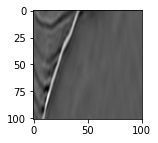

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(2,2))
plt.imshow(mpimg.imread("./data/membrane/test/1.png"))

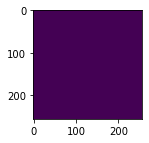

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(mpimg.imread("./data/membrane/test/0_predict.png"))

### 【問題2】コードリーディング

論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

1. 